<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/lantibiotics/blob/main/heatmap_lenght_identity_2023_09_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat map

In [81]:
! pip install Bio

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import pandas as pd

# db = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/Lantibiotics_2021-09.fasta')

bee_13 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_13_S00_matches_cyp.tsv', sep='\t', header=None)
bee_20 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_20_S00_matches_cyp.tsv', sep='\t', header=None)
bee_25 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_25_S00_matches_cyp.tsv', sep='\t', header=None)
bee_33 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_33_S00_matches_cyp.tsv', sep='\t', header=None)
bee_41 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_41_S00_matches_cyp.tsv', sep='\t', header=None)
bee_4 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_4_S00_matches_cyp.tsv', sep='\t', header=None)
bee_66 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_66_S00_matches_cyp.tsv', sep='\t', header=None)
bee_75 = pd.read_csv('https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/CYPs/bee_75_S00_matches_cyp.tsv', sep='\t', header=None)

In [84]:
bees_var = [bee_13, bee_20, bee_25, bee_33, bee_41, bee_4, bee_66, bee_75]
bees_names = ['bee_13', 'bee_20', 'bee_25', 'bee_33', 'bee_41', 'bee_4', 'bee_66', 'bee_75']

In [85]:
from Bio import SeqIO
import requests
from io import StringIO

link = "https://raw.githubusercontent.com/AnastasiyaKrokhina/lantibiotics/main/data/P450_db_12062018.fasta"
data = requests.get(link).text

fasta_iterator = SeqIO.parse(StringIO(data), "fasta")

lantibiotics_id_list = []

# Pretty print the fasta info
for seq in fasta_iterator:
  lantibiotics_id_list.append(seq.id)

name = 'CYP450'

table_data = {f'{name}': [ str(i) for i in lantibiotics_id_list]}

In [98]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :3].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 2]].set_index(1).rename(columns={2: f'{nam}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names, table_data, amino_as_name):

  df = pd.DataFrame(table_data).drop_duplicates().set_index(f'{amino_as_name}')
  df.drop_duplicates(subset=[f'{amino_as_name}'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)

def most_probable_sequence(df):
  df['sum'] = df.sum (axis=1)
  df.sort_values(by='sum', ascending=False, inplace=True)

  # pos = len(df.columns) - 1
  # df.drop(columns=df.columns[pos], inplace=True)
  return df

def make_plot(df):
  l = len(df.columns) - 1
  num_rows, num_cols = df.iloc[:10, :l].shape
  fig_width = max(10, num_cols * 2)
  fig_height = max(l, num_rows * 0.5)

  f, ax = plt.subplots(figsize=(fig_width, fig_height))
  sns.heatmap(df.iloc[:10, :l], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

  plt.show()

<ipython-input-86-3c8cefd22b77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-86-3c8cefd22b77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-86-3c8cefd22b77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

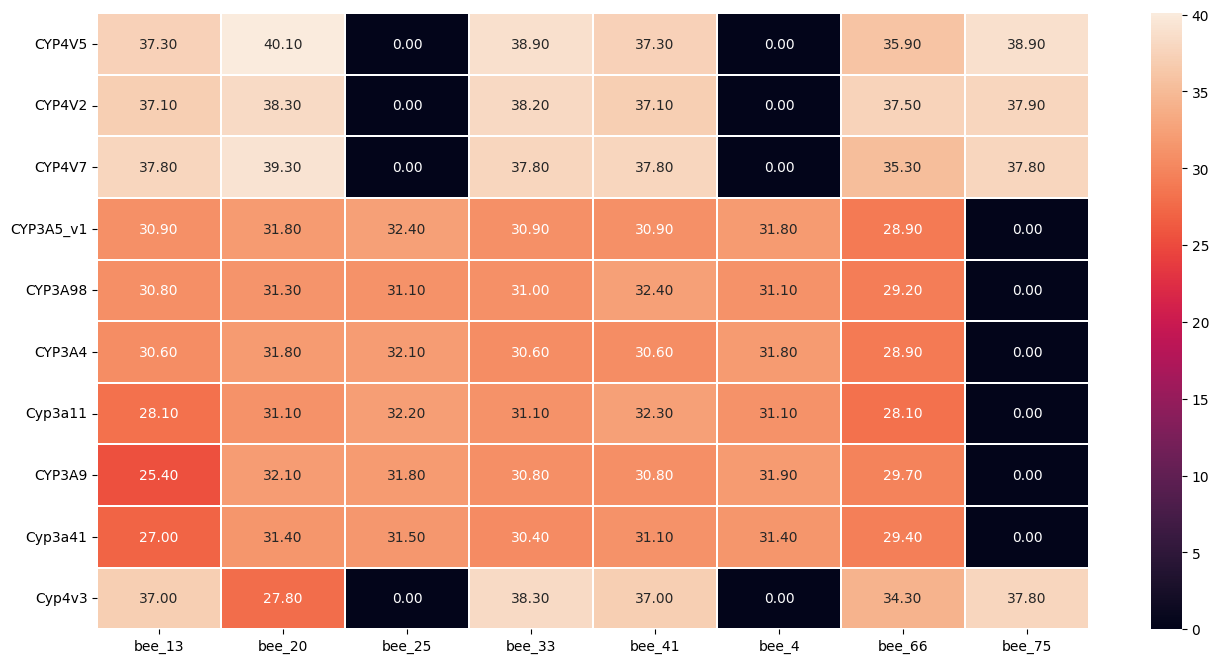

In [87]:
# !!! сделать декоратор !!!

df1 = most_probable_sequence(make_df_for_heatmap(bees_var, bees_names, table_data, name))
make_plot(df1)

In [88]:
def data_250(df, length=250, col=3):

  filtered_df = df[df[col] >= 250]
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
  return filtered_df


def bee_lantibiotics_data_preparation(bee, nam, df):
  bee = data_250(bee)
  bee = bee.iloc[:, :4].sort_values(by=2).drop_duplicates(subset=[1])

  return df.join(
                 bee[[1, 3]].set_index(1).rename(columns={3: f'{nam}'}),
                 how='outer'
                 )

def make_df_for_heatmap(var, names, table_data, amino_as_name):

  df = pd.DataFrame(table_data).drop_duplicates().set_index(f'{amino_as_name}')
  df.drop_duplicates(subset=[f'{amino_as_name}'], keep='first', inplace=True)

  for be, nam in zip(var, names):
    df = bee_lantibiotics_data_preparation(be, nam, df)

  df.dropna(how='all', subset=df.columns.values[2:], inplace=True)
  return df.fillna(0)

def most_probable_sequence(df):
  df['sum'] = df.sum (axis=1)
  df.sort_values(by='sum', ascending=False, inplace=True)

  pos = len(df.columns) - 1
  df.drop(columns=df.columns[pos], inplace=True)
  return df

# def make_plot(df):
#   l = len(df.columns)
#   num_rows, num_cols = df.iloc[:10, :l].shape
#   fig_width = max(10, num_cols * 2)
#   fig_height = max(l, num_rows * 0.5)

#   f, ax = plt.subplots(figsize=(fig_width, fig_height))
#   sns.heatmap(df.iloc[:10, :l], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")

#   plt.show()

In [89]:
df_lens = most_probable_sequence(make_df_for_heatmap(bees_var, bees_names, table_data, name))
# make_plot(df_lens)

<ipython-input-88-148db63b33d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-88-148db63b33d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipython-input-88-148db63b33d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(ascending=False, inplace=True, by=col)
<ipytho

In [90]:
df1

,bee_13,bee_20,bee_25,bee_33,bee_41,bee_4,bee_66,bee_75,sum
CYP4V5,37.3,40.1,0.0,38.9,37.3,0.0,35.9,38.9,228.4
CYP4V2,37.1,38.3,0.0,38.2,37.1,0.0,37.5,37.9,226.1
CYP4V7,37.8,39.3,0.0,37.8,37.8,0.0,35.3,37.8,225.8
CYP3A5_v1,30.9,31.8,32.4,30.9,30.9,31.8,28.9,0.0,217.6
CYP3A98,30.8,31.3,31.1,31.0,32.4,31.1,29.2,0.0,216.9
...,...,...,...,...,...,...,...,...,...
CYP71A18,0.0,0.0,0.0,0.0,0.0,0.0,25.3,0.0,25.3
CYP628B1,0.0,0.0,0.0,0.0,25.2,0.0,0.0,0.0,25.2
CYP102J1,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0
CYP13A.d,0.0,0.0,0.0,24.8,0.0,0.0,0.0,0.0,24.8


In [91]:
cyp_indeces_sorted = pd.DataFrame(df1.index).set_index(0)


In [92]:
df_lens['sum'] = df1['sum']
df_lens.sort_values(by='sum', ascending=False, inplace=True)

In [93]:
df_lens

,bee_13,bee_20,bee_25,bee_33,bee_41,bee_4,bee_66,bee_75,sum
CYP4V5,542.0,461.0,0.0,496.0,542.0,0.0,488.0,496.0,228.4
CYP4V2,544.0,515.0,0.0,497.0,544.0,0.0,467.0,515.0,226.1
CYP4V7,505.0,511.0,0.0,505.0,505.0,0.0,519.0,505.0,225.8
CYP3A5_v1,511.0,497.0,490.0,517.0,517.0,497.0,284.0,0.0,217.6
CYP3A98,526.0,505.0,515.0,526.0,460.0,505.0,288.0,0.0,216.9
...,...,...,...,...,...,...,...,...,...
CYP71A18,0.0,0.0,0.0,0.0,0.0,0.0,336.0,0.0,25.3
CYP628B1,0.0,0.0,0.0,0.0,301.0,0.0,0.0,0.0,25.2
CYP102J1,0.0,0.0,0.0,0.0,268.0,0.0,0.0,0.0,25.0
CYP13A.d,0.0,0.0,0.0,501.0,0.0,0.0,0.0,0.0,24.8


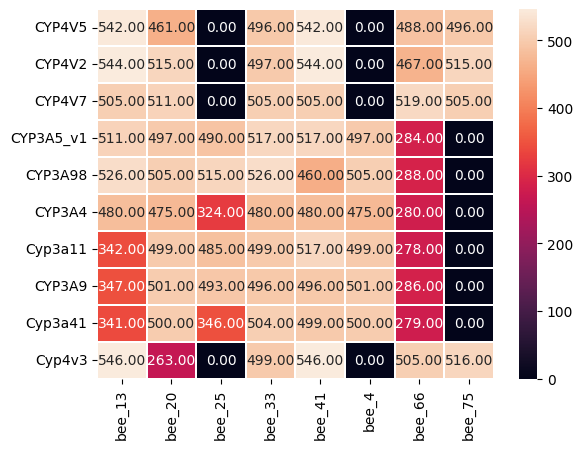

In [99]:
make_plot(df_lens)

<Axes: >

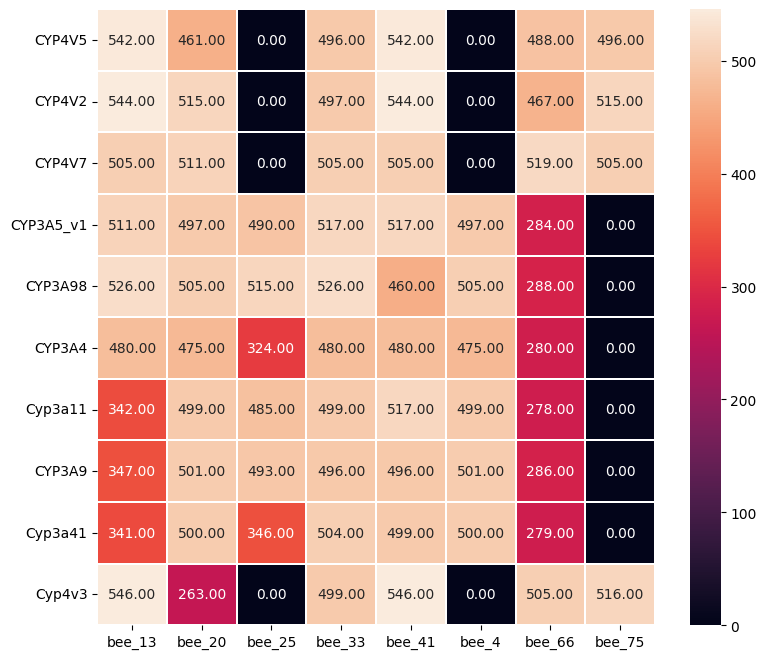

In [103]:
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(df_lens.iloc[:10, :8], annot=True, linewidths=.2, ax=ax, annot_kws={"size": 10}, fmt=".2f")